In [1]:
pip install DeepImageSearch


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the proper classes
from DeepImageSearch import Index,LoadData,SearchImage

In [2]:
# load the Images from the Folder (You can also import data from multiple folders in python list type)
image_list = LoadData().from_folder(["/home/chkim/sample/similar"])

In [3]:
print(image_list[0])

/home/chkim/sample/similar/coca cola can_675.jpg


In [4]:
# For Faster Serching we need to index Data first, After Indexing all the meta data stored on the local path
Index(image_list).Start()

2022-11-07 20:20:57.622484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:20:57.628142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:20:57.628624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 20:20:57.629519: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Image Meta Information Saved: [meta-data-files/image_data_features.pkl]


1007it [00:00, 2405.00it/s]

Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


In [7]:
import os

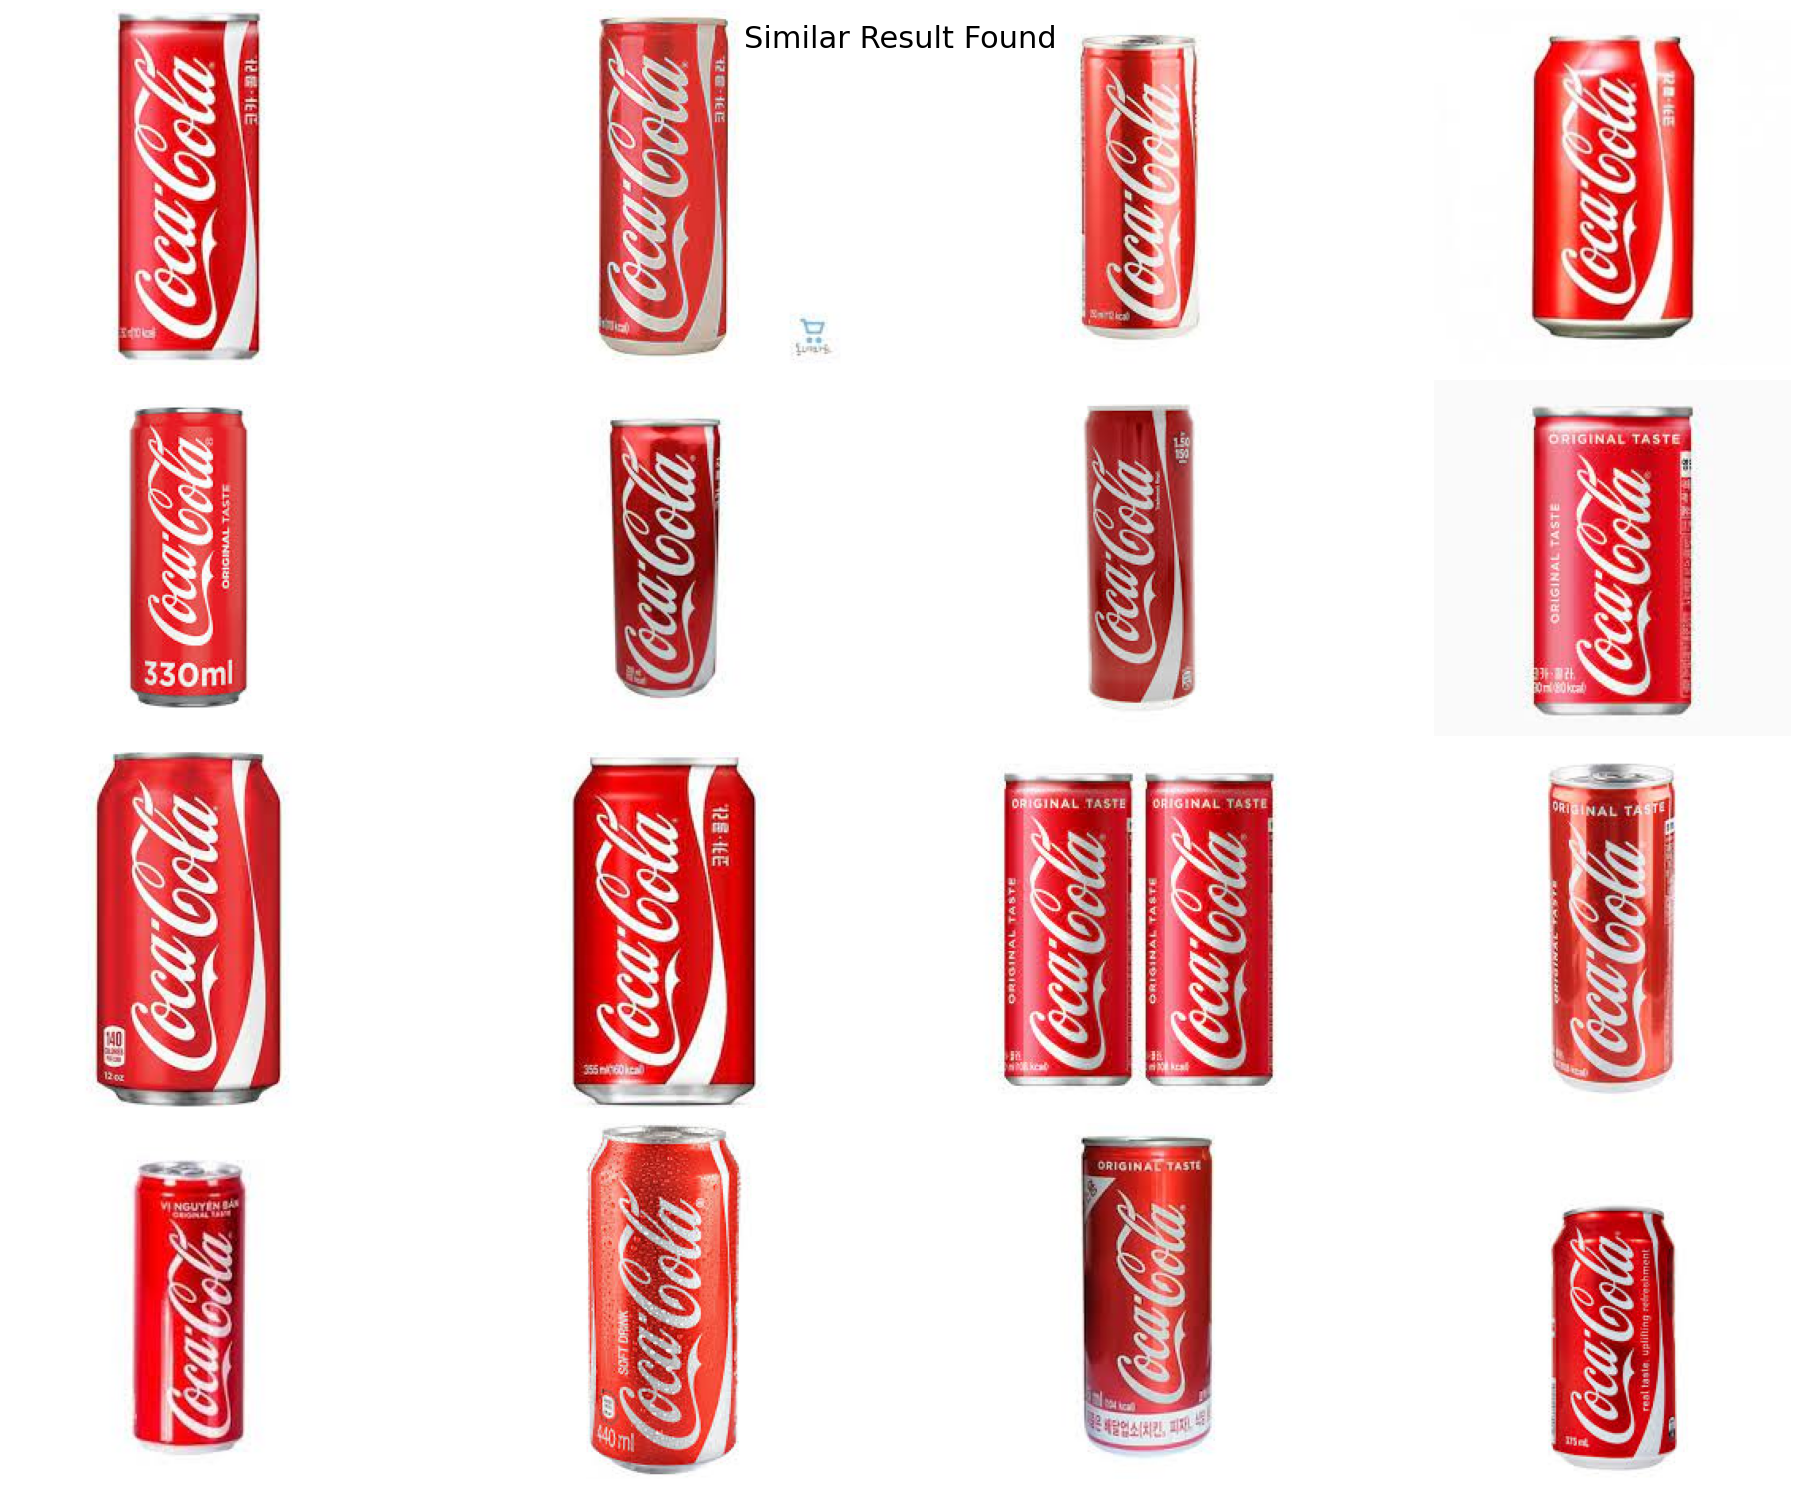

In [9]:
SearchImage().plot_similar_images(image_path='/home/chkim/sample/similar/coca cola can_0.jpg')

In [10]:
sim_dic = {}

In [11]:
sim_dic = SearchImage().get_similar_images(image_path='/home/chkim/sample/similar/coca cola can_0.jpg',number_of_images=50)

In [12]:
print(sim_dic)

{780: '/home/chkim/sample/similar/coca cola can_0.jpg', 861: '/home/chkim/sample/similar/coca cola can_9.jpg', 917: '/home/chkim/sample/similar/coca cola can_19.jpg', 967: '/home/chkim/sample/similar/coca cola can_7.jpg', 504: '/home/chkim/sample/similar/coca cola can_634.jpg', 254: '/home/chkim/sample/similar/coca cola can_11.jpg', 854: '/home/chkim/sample/similar/coca cola can_671.jpg', 194: '/home/chkim/sample/similar/coca cola can_5.jpg', 898: '/home/chkim/sample/similar/coca cola can_591.jpg', 78: '/home/chkim/sample/similar/coca cola can_1.jpg', 256: '/home/chkim/sample/similar/coca cola can_4.jpg', 27: '/home/chkim/sample/similar/coca cola can_2.jpg', 180: '/home/chkim/sample/similar/coca cola can_113.jpg', 813: '/home/chkim/sample/similar/coca cola can_611.jpg', 284: '/home/chkim/sample/similar/coca cola can_6.jpg', 788: '/home/chkim/sample/similar/coca cola can_636.jpg', 977: '/home/chkim/sample/similar/coca cola can_686.jpg', 956: '/home/chkim/sample/similar/coca cola can_616

In [16]:
path = sim_dic[780]
path[len('/home/chkim/sample/similar/'):]

'coca cola can_0.jpg'

In [18]:
from PIL import Image

for vec, file_name in sim_dic.items():
    img = Image.open(file_name)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    path = sim_dic[vec]
    img.save("/home/chkim/sample/result/" + path[len('/home/chkim/sample/similar/'):])